In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up Seaborn
sns.set()

In [37]:
df = pd.read_csv("./bank-marketing/bank.csv")

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [39]:
df.drop(['job', 'default', 'day', 'month', 'pdays',], axis = 1 , inplace=True)

In [40]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [41]:
df.head()

,age,marital,education,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,30,married,primary,1787,no,no,cellular,79,1,0,unknown,no
1,33,married,secondary,4789,yes,yes,cellular,220,1,4,failure,no
2,35,single,tertiary,1350,yes,no,cellular,185,1,1,failure,no
3,30,married,tertiary,1476,yes,yes,unknown,199,4,0,unknown,no
4,59,married,secondary,0,yes,no,unknown,226,1,0,unknown,no


In [47]:
df['marital'] = df['marital'].replace('divorced', 'single')

In [48]:
df['marital'].value_counts()

married    2797
single     1724
Name: marital, dtype: int64

In [51]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [53]:
df['education'] = df['education'].apply(lambda x : "educated" if x != "unkown" and x != "primary" else "uneducated")

In [67]:
df.drop(['poutcome', 'contact'], inplace=True, axis=1)

In [69]:
df.head()

,age,marital,education,balance,housing,loan,duration,campaign,previous,y
0,30,married,uneducated,1787,no,no,79,1,0,no
1,33,married,educated,4789,yes,yes,220,1,4,no
2,35,single,educated,1350,yes,no,185,1,1,no
3,30,married,educated,1476,yes,yes,199,4,0,no
4,59,married,educated,0,yes,no,226,1,0,no


In [72]:
df['education'] = df['education'].apply(lambda x : 1 if x == "educated" else 0)

In [75]:
df['housing'] = df['housing'].apply(lambda x : 1 if x == "yes" else 0 )

In [77]:
df['loan'] = df['loan'].apply(lambda x : 1 if x == "yes" else 0 )

In [79]:
df['marital'] = df['marital'].apply(lambda x : 1 if x == "married" else 0 )

In [80]:
df

,age,marital,education,balance,housing,loan,duration,campaign,previous,y
0,30,1,0,1787,0,0,79,1,0,no
1,33,1,1,4789,1,1,220,1,4,no
2,35,0,1,1350,1,0,185,1,1,no
3,30,1,1,1476,1,1,199,4,0,no
4,59,1,1,0,1,0,226,1,0,no
...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,-333,1,0,329,5,0,no
4517,57,1,1,-3313,1,1,153,1,0,no
4518,57,1,1,295,0,0,151,11,0,no
4519,28,1,1,1137,0,0,129,4,3,no


In [81]:
X = df.drop('y', axis=1)
Y = df['y']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.5, stratify=Y)

In [86]:
Y_train.value_counts()

no     2000
yes     260
Name: y, dtype: int64

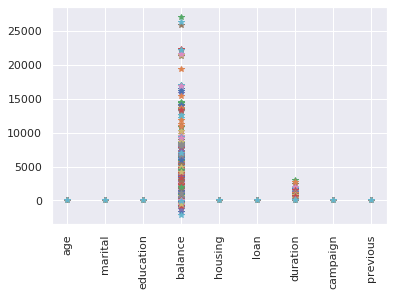

In [92]:
plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [93]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

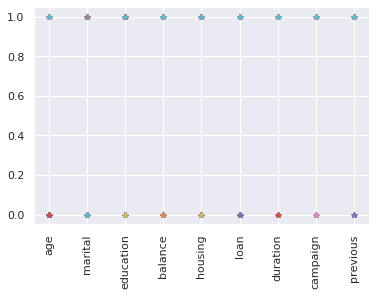

In [94]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [95]:
X_binarised_test = X_test.apply(pd.cut, bins=2 , labels = [1,0])

In [96]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [97]:
X_binarised_train

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]], dtype=object)